In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('digit-recognizer/train.csv')


In [50]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data =  np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


In [9]:
Y_train

array([6, 4, 2, ..., 7, 0, 2], dtype=int64)

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_train[:,0].shape

(784,)

In [12]:
def init_params():
    w_1 = np.random.rand(10,784) - 0.5
    b_1 = np.random.rand(10,1) - 0.5
    w_2   = np.random.rand(10,10) - 0.5
    b_2 = np.random.rand(10,1) - 0.5
    return w_1,b_1,w_2,b_2

In [13]:
def ReLU(Z):
    return np.maximum(0,Z)

In [14]:
def derv_ReLU(Z):
    return Z>0

In [15]:
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

In [16]:
def forward_prop(w_1,b_1,w_2,b_2,X):
    Z_1 = w_1.dot(X) + b_1
    A_1 = ReLU(Z_1)
    Z_2 = w_2.dot(A_1)+b_2
    A_2 = softmax(Z_2)
    
    return Z_1,A_1,Z_2,A_2

In [17]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] =1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [18]:
def back_prop(Z_1,A_1,Z_2,A_2,W_2,X, Y):
    one_hot_Y = one_hot(Y)
    d_Z_2 = A_2 - one_hot_Y
    d_W_2 =(1 / m)  * d_Z_2.dot(A_1.T)
    d_b_2 = (1 /m) *np.sum(d_Z_2)
    d_Z_1 = W_2.T.dot(d_Z_2)* derv_ReLU(Z_1)
    d_W_1 = 1/m * d_Z_1.dot(X.T)
    d_b_1 = 1/m * np.sum(d_Z_1)
    return d_W_1,d_b_1,d_W_2,d_b_2

In [19]:
def update_params(w_1,b_1,w_2,b_2,d_W_1,d_b_1,d_W_2,d_b_2,alpha):
    w_1 = w_1 -alpha *d_W_1
    w_2 = w_2 -alpha *d_W_2
    b_1 = b_1 -alpha * d_b_1
    b_2 = b_2 -alpha * d_b_2
    return w_1,b_1,w_2,b_2

In [20]:
def get_predictions(A_2):
    return np.argmax(A_2,0)

In [21]:
def get_accuracy(predictions,Y):
    return np.sum(predictions == Y)/Y.size

In [22]:
def gradient_descent(X,Y,iterations,alpha):
    w_1,b_1,w_2,b_2 = init_params()
    
    for i in range(iterations):
        Z_1, A_1, Z_2, A_2 = forward_prop(w_1, b_1, w_2, b_2, X)
        d_W_1,d_b_1,d_W_2,d_b_2 = back_prop(Z_1,A_1,Z_2,A_2,w_2,X,Y)
        w_1,b_1,w_2,b_2 = update_params(w_1,b_1,w_2,b_2,d_W_1,d_b_1,d_W_2,d_b_2,alpha)
        if i % 10 == 0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A_2),Y)) 
    return w_1,b_1,w_2,b_2
    
    
    

In [32]:
w_1,b_1,w_2,b_2 = gradient_descent(X_train,Y_train,1000,0.10)

Iteration:  0
Accuracy:  0.08275609756097561
Iteration:  10
Accuracy:  0.2553170731707317
Iteration:  20
Accuracy:  0.3400487804878049
Iteration:  30
Accuracy:  0.38397560975609757
Iteration:  40
Accuracy:  0.4191219512195122
Iteration:  50
Accuracy:  0.45463414634146343
Iteration:  60
Accuracy:  0.49590243902439024
Iteration:  70
Accuracy:  0.5356829268292683
Iteration:  80
Accuracy:  0.5681463414634146
Iteration:  90
Accuracy:  0.5991951219512195
Iteration:  100
Accuracy:  0.6262926829268293
Iteration:  110
Accuracy:  0.6491463414634147
Iteration:  120
Accuracy:  0.6690487804878049
Iteration:  130
Accuracy:  0.6861951219512196
Iteration:  140
Accuracy:  0.7019268292682926
Iteration:  150
Accuracy:  0.715609756097561
Iteration:  160
Accuracy:  0.7278292682926829
Iteration:  170
Accuracy:  0.7381951219512195
Iteration:  180
Accuracy:  0.7476829268292683
Iteration:  190
Accuracy:  0.756780487804878
Iteration:  200
Accuracy:  0.7645121951219512
Iteration:  210
Accuracy:  0.77121951219512

In [33]:
def make_predictions(X,w_1,b_1,w_2,b_2):
    _,_,_,A_2 = forward_prop(w_1,b_1,w_2,b_2,X)
    predictions = get_predictions(A_2)
    return predictions

In [34]:
def test_prediction(index,w_1,b_1,w_2,b_2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:, index, None],w_1,b_1,w_2,b_2)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [6]
Label: 6


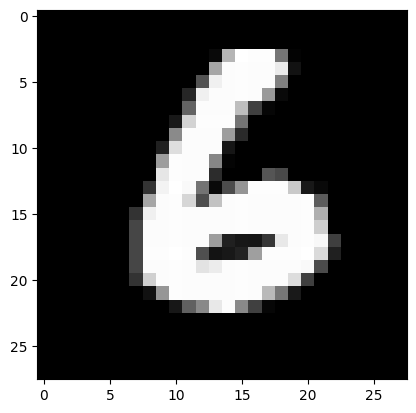

Prediction: [4]
Label: 4


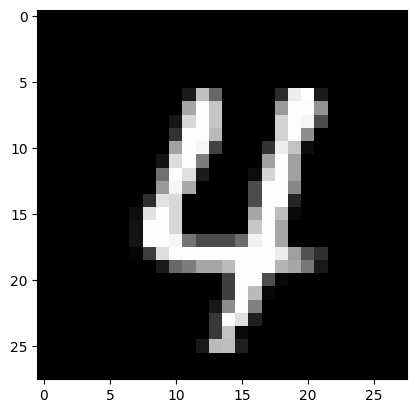

Prediction: [2]
Label: 2


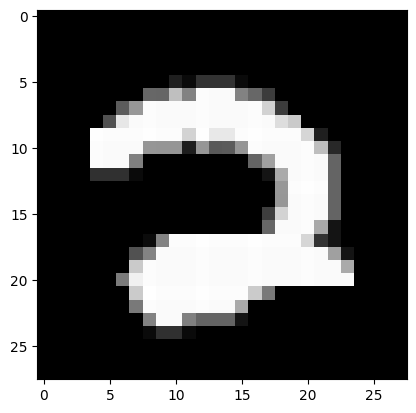

Prediction: [6]
Label: 6


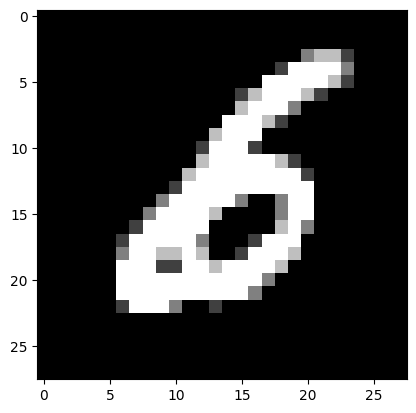

In [35]:
test_prediction(0,w_1,b_1,w_2,b_2)
test_prediction(1,w_1,b_1,w_2,b_2)
test_prediction(2,w_1,b_1,w_2,b_2)
test_prediction(3,w_1,b_1,w_2,b_2)

In [36]:
dev_predictions = make_predictions(X_dev,w_1,b_1,w_2,b_2)
get_accuracy(dev_predictions,Y_dev)

0.879